Calculando bandas para alpha = 0.0...
Calculando bandas para alpha = 0.5...
Calculando bandas para alpha = 2.0...


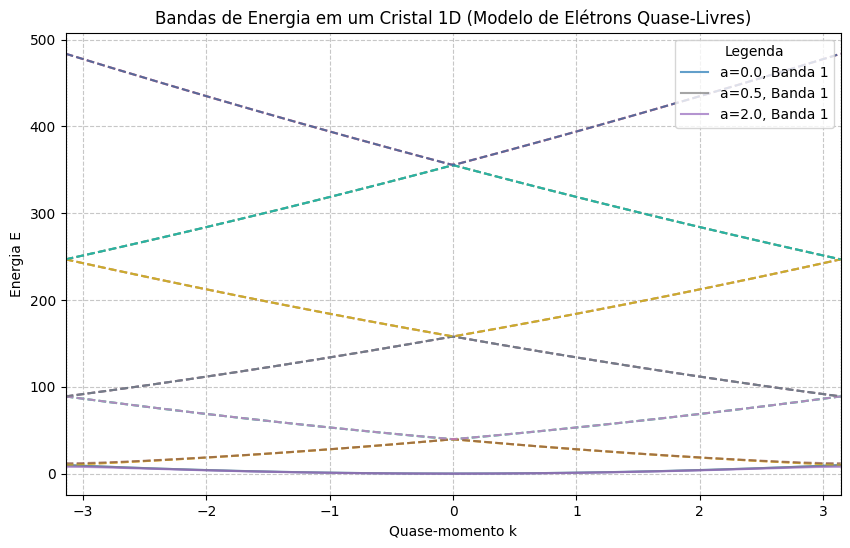

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Função para Construir o Hamiltoniano (build_hamiltonian_with_diag) ---
def build_hamiltonian_with_diag(k_value, alpha, num_G_vectors):

    # Define os índices para os vetores G, centrados em G=0.
    # Ex: se num_G_vectors = 7, indices_G será [-3, -2, -1, 0, 1, 2, 3]
    indices_G = np.arange(-(num_G_vectors // 2), (num_G_vectors + 1) // 2)

    # Converte os índices em valores de G (G_n = 2*pi*n)
    G_vectors = 2 * np.pi * indices_G

    # Calcula os elementos da diagonal principal (termo de energia cinética: |k - G_n|^2)
    # Ex: para k=0, G_vectors=[-6.28, -4.19, -2.09, 0, 2.09, 4.19, 6.28]
    # diagonal_main terá os valores (0 - G_n)^2
    diagonal_main = (k_value - G_vectors)**2

    # Cria um array com os valores para as diagonais secundárias (acoplamento do potencial: alpha)
    # Uma matriz NxN tem N-1 elementos nas diagonais acima e abaixo da principal.
    diagonal_alpha = np.full(num_G_vectors - 1, alpha)

    # Inicia a matriz Hamiltoniana com a diagonal principal preenchida.
    H = np.diag(diagonal_main)

    # Adiciona a diagonal imediatamente acima da principal (k=1) com os valores 'alpha'.
    H += np.diag(diagonal_alpha, k=1)

    # Adiciona a diagonal imediatamente abaixo da principal (k=-1) com os valores 'alpha'.
    H += np.diag(diagonal_alpha, k=-1)

    return H

# --- 2. Função para Calcular as Bandas de Energia (calculate_bands) ---
def calculate_bands(alpha, num_G_vectors, k_points):

    all_eigenvalues = [] # Lista para armazenar os autovalores de energia para cada k_point

    for k_val in k_points: # Itera sobre cada valor de k no array k_points
        # Constrói a matriz Hamiltoniana H para o k_val atual
        H_matrix = build_hamiltonian_with_diag(k_val, alpha, num_G_vectors)

        # --- AQUI É ONDE A DIAGONALIZAÇÃO ACONTECE! ---
        # np.linalg.eigvalsh(H_matrix) calcula os autovalores de uma matriz Hermitiana
        # (ou simétrica real, como é o nosso caso do Hamiltoniano).
        # Ele retorna um array 1D com os autovalores.
        eigenvalues = np.linalg.eigvalsh(H_matrix)

        # Ordena os autovalores (energias) do menor para o maior.
        # Isso é fundamental para que as "bandas" de energia sejam plotadas corretamente
        # e não haja cruzamentos indesejados visualmente.
        all_eigenvalues.append(np.sort(eigenvalues))

    # Converte a lista de arrays de autovalores em um único array NumPy 2D.
    # Onde as linhas correspondem aos k_points e as colunas às diferentes bandas de energia.
    return np.array(all_eigenvalues)

# --- 3. Parâmetros para Simulação ---
# Define o intervalo da 1ª Zona de Brillouin para k
k_points = np.linspace(-np.pi, np.pi, 200) # 200 pontos entre -pi e pi para uma curva suave

# Define diferentes intensidades de potencial (alpha) para testar
# alpha = 0.0 simula elétrons livres (sem potencial periódico).
# alpha > 0.0 mostra o efeito do potencial, como a abertura de gaps.
alphas = [0.0, 0.5, 2.0]

# Define o número de vetores G a serem incluídos na base (tamanho da matriz H)
# Um número ímpar (como 7) é comum para centrar os G_n em 0 (n=-3, -2, ..., 3).
# Mais G_vectors -> maior precisão, mas maior custo computacional.
num_G_vectors = 7

# --- 4. Execução e Plotagem ---
plt.figure(figsize=(10, 6)) # Cria uma figura (janela de gráfico) com tamanho 10x6 polegadas

for alpha_val in alphas: # Itera sobre cada valor de alpha na lista 'alphas'
    print(f"Calculando bandas para alpha = {alpha_val}...") # Mensagem de progresso

    # Chama a função para calcular as energias das bandas para o alpha_val atual
    energies = calculate_bands(alpha_val, num_G_vectors, k_points)

    # Plota cada banda de energia
    for i in range(num_G_vectors): # Itera sobre cada uma das 'num_G_vectors' bandas
        # energies[:, i] seleciona todos os valores da i-ésima coluna (i-ésima banda)
        # label: define o texto para a legenda (apenas para a primeira banda de cada alpha para não poluir)
        # linestyle: define o estilo da linha (sólida para a primeira banda, tracejada para as outras)
        # alpha: define a transparência da linha
        plt.plot(k_points, energies[:, i],
                 label=f'a={alpha_val}, Banda {i+1}' if i == 0 else "",
                 linestyle='-' if i==0 else '--',
                 alpha=0.7)

    # Desenha linhas verticais para indicar as fronteiras da 1ª Zona de Brillouin (-pi e +pi)
    plt.axvline(x=-np.pi, color='gray', linestyle=':', linewidth=0.8)
    plt.axvline(x=np.pi, color='gray', linestyle=':', linewidth=0.8)

# --- 5. Configurações Finais do Gráfico ---
plt.title('Bandas de Energia em um Cristal 1D (Modelo de Elétrons Quase-Livres)') # Título principal do gráfico
plt.xlabel('Quase-momento k') # Rótulo do eixo X
plt.ylabel('Energia E') # Rótulo do eixo Y
plt.grid(True, linestyle='--', alpha=0.7) # Adiciona uma grade ao gráfico
plt.xlim(-np.pi, np.pi) # Define os limites do eixo X para a 1ª Zona de Brillouin
plt.legend(loc='upper right', title="Legenda") # Exibe a legenda na posição superior direita
plt.show() # Exibe a janela do gráfico